# **Вовед во науката за податоци**
# 2021/22
# Семинарска работа - 193041
Fake and real news dataset
https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

# Importing modules and loading the datasets

In [2]:
import numpy as np
import pandas as pd
import re
import string
import nltk
import sys
import warnings
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
%matplotlib inline
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn import metrics
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [3]:
df_true = pd.read_csv('/content/drive/MyDrive/True.csv')
df_fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')

In [4]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
df_true['label'] = 1

In [6]:
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [7]:
df_true.shape

(21417, 5)

In [8]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [9]:
df_fake['label'] = 0

In [10]:
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
dataset = pd.concat([df_fake, df_true])

In [12]:
dataset

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


# Preprocessing

In [14]:
dataset = dataset.drop(["subject","title","date"], axis=1)

In [15]:
dataset = dataset.sample(frac = 1)
dataset

,text,label
20375,"To hell with the common sense voter, Hillary b...",0
5142,(Reuters) - Highlights of the day for U.S. Pre...,1
11106,IT S INTERESTING THAT A LIGHTHEARTED MOMENT LI...,0
23389,21st Century Wire says Author David Icke break...,0
8100,Presidential candidate Senator Ted Cruz (R-TX)...,0
...,...,...
4822,Trust Funny Or Die to come up with something l...,0
9169,This could be one of the largest scandals of o...,0
7133,SAN FRANCISCO (Reuters) - The main U.S. visa p...,1
9707,WASHINGTON (Reuters) - Legislation to help Pue...,1


In [16]:
dataset.shape

(44898, 2)

In [17]:
dataset.drop_duplicates(inplace = True)
dataset.shape

(38647, 2)

In [18]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [19]:
dataset['text'] = dataset['text'].str.lower()
dataset['text'] = dataset['text'].str.replace('[^a-z0-9\s]','')
dataset['text'] = dataset['text'].str.replace('\n','')
dataset['text'] = dataset['text'].str.replace('\s+',' ')
dataset['text']

20375    to hell with the common sense voter hillary be...
5142     reuters highlights of the day for us president...
11106    it s interesting that a lighthearted moment li...
23389    21st century wire says author david icke break...
8100     presidential candidate senator ted cruz rtx vi...
                               ...                        
6353     this may shock you but michelle obama wears cl...
4822     trust funny or die to come up with something l...
7133     san francisco reuters the main us visa program...
9707     washington reuters legislation to help puerto ...
5917     according to pastor darrell reid he was cleani...
Name: text, Length: 38647, dtype: object

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stop = stopwords.words('english')
dataset['text'] = dataset['text'].apply(lambda t: " ".join([word for word in t.split() if word not in stop]))
dataset.head()

,text,label
20375,hell common sense voter hillary believes needs...,0
5142,reuters highlights day us president donald tru...,1
11106,interesting lighthearted moment like one could...,0
23389,21st century wire says author david icke break...,0
8100,presidential candidate senator ted cruz rtx vi...,0


# Exploratory Data Analysis

In [22]:
all_words = " ".join([sentence for sentence in dataset['text'][dataset['label']==1]])
wordcloud = WordCloud(width=750, height=450, random_state=42, max_font_size=90).generate(all_words)

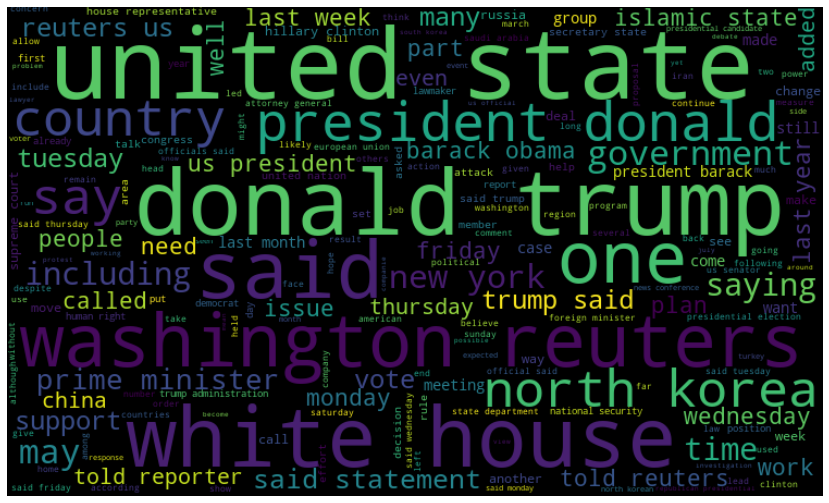

In [23]:
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
all_words = " ".join([sentence for sentence in dataset['text'][dataset['label']==0]])
wordcloud = WordCloud(width=750, height=450, random_state=42, max_font_size=90).generate(all_words)

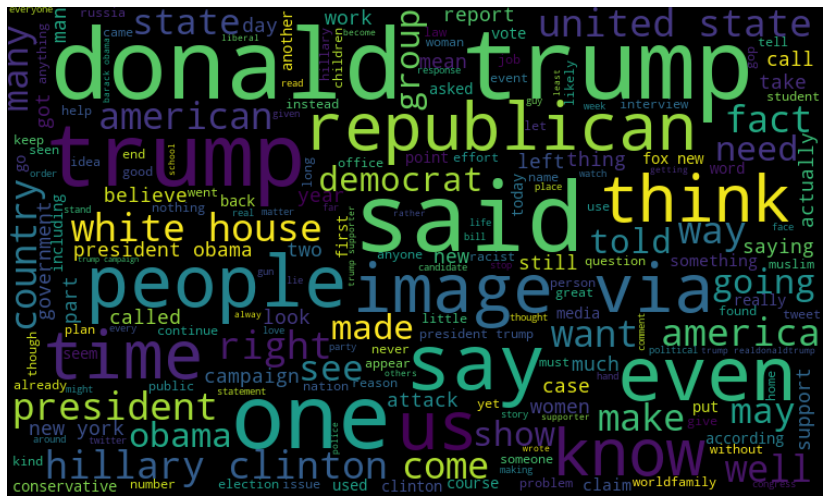

In [25]:
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Tokenization

In [26]:
tokenizer = Tokenizer()

In [27]:
tokenizer.fit_on_texts(dataset['text'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

227585

In [28]:
def find_max_article_length(articles):
  maxlen = 0
  counter = 0
  for article in articles:
    a = article.split()
    num_words = len(a)
    if num_words > maxlen:
      maxlen = num_words
      counter += 1 
      savedArticle = article
  return maxlen

In [29]:
print(find_max_article_length(dataset['text']))

4920


In [30]:
sequences = tokenizer.texts_to_sequences(dataset['text'])
pad_seq = pad_sequences(sequences, maxlen=4920, padding='post', truncating='post')

In [31]:
embedding_index = {}
with open('/content/drive/MyDrive/glove.6B.100d.txt', encoding='utf-8') as f:
  for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs

In [32]:
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
  embedding_vector = embedding_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [33]:
embedding_matrix[1]

array([-0.13128   , -0.45199999,  0.043399  , -0.99798   , -0.21053   ,
       -0.95867997, -0.24608999,  0.48413   ,  0.18178   ,  0.47499999,
       -0.22305   ,  0.30063999,  0.43496001, -0.36050001,  0.20245001,
       -0.52594   , -0.34707999,  0.0075873 , -1.04970002,  0.18673   ,
        0.57369   ,  0.43814   ,  0.098659  ,  0.38769999, -0.22579999,
        0.41911   ,  0.043602  , -0.73519999, -0.53583002,  0.19276001,
       -0.21961001,  0.42515001, -0.19081999,  0.47187001,  0.18826   ,
        0.13357   ,  0.41839001,  1.31379998,  0.35677999, -0.32172   ,
       -1.22570002, -0.26635   ,  0.36715999, -0.27586001, -0.53245997,
        0.16786   , -0.11253   , -0.99958998, -0.60706002, -0.89270997,
        0.65156001, -0.88783997,  0.049233  ,  0.67110997, -0.27553001,
       -2.40050006, -0.36989   ,  0.29135999,  1.34979999,  1.73529994,
        0.27000001,  0.021299  ,  0.14421999,  0.023784  ,  0.33643001,
       -0.35475999,  1.09210002,  1.48450005,  0.49430001,  0.15

# Splitting the dataset into train and test subsets

In [34]:
pad_seq[1]

array([   8, 5478,  111, ...,    0,    0,    0], dtype=int32)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(pad_seq, dataset['label'], test_size=0.20, random_state=42, stratify=dataset['label'])

# Training the LSTM model

In [36]:
model_lstm = Sequential([
    Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

In [37]:
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         22758600  
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 22,909,129
Trainable params: 150,529
Non-t

In [38]:
history = model_lstm.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
121/121 [==============================] - 232s 2s/step - loss: 0.6889 - accuracy: 0.5472 - val_loss: 0.6885 - val_accuracy: 0.5484
Epoch 2/10
121/121 [==============================] - 223s 2s/step - loss: 0.6886 - accuracy: 0.5484 - val_loss: 0.6885 - val_accuracy: 0.5484
Epoch 3/10
121/121 [==============================] - 226s 2s/step - loss: 0.6886 - accuracy: 0.5484 - val_loss: 0.6885 - val_accuracy: 0.5484
Epoch 4/10
121/121 [==============================] - 228s 2s/step - loss: 0.6887 - accuracy: 0.5484 - val_loss: 0.6885 - val_accuracy: 0.5484
Epoch 5/10
121/121 [==============================] - 228s 2s/step - loss: 0.6886 - accuracy: 0.5484 - val_loss: 0.6885 - val_accuracy: 0.5484
Epoch 6/10
121/121 [==============================] - 227s 2s/step - loss: 0.6887 - accuracy: 0.5484 - val_loss: 0.6886 - val_accuracy: 0.5484
Epoch 7/10
121/121 [==============================] - 229s 2s/step - loss: 0.6886 - accuracy: 0.5484 - val_loss: 0.6886 - val_accuracy: 0.5484

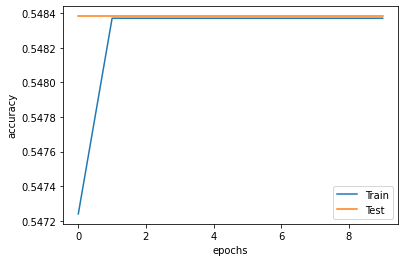

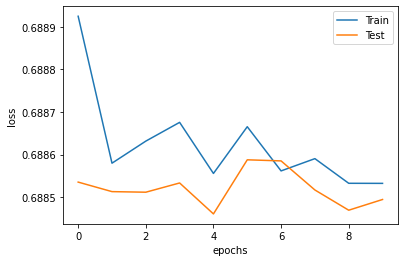

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

# Trying different models

In [40]:
x_train, x_test, y_train, y_test = train_test_split(dataset['text'], dataset['label'], test_size=0.25)

In [41]:
vectorizer = CountVectorizer()
vectorized_text_train = vectorizer.fit_transform(x_train)
vectorized_text_test = vectorizer.transform(x_test)

Logistic Regression

In [42]:
model_lr = LogisticRegression()
model_lr.fit(vectorized_text_train, y_train)

LogisticRegression()

In [43]:
model_lr.score(vectorized_text_test, y_test)

0.9951355826950942

In [44]:
pred = model_lr.predict(vectorized_text_test)

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4393
           1       0.99      1.00      1.00      5269

    accuracy                           1.00      9662
   macro avg       1.00      0.99      1.00      9662
weighted avg       1.00      1.00      1.00      9662



In [46]:
conmat = confusion_matrix(y_test, pred)
val = np.mat(conmat) 
classnames = list(set(y_train))
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )
print(df_cm)

      0     1
0  4363    30
1    17  5252


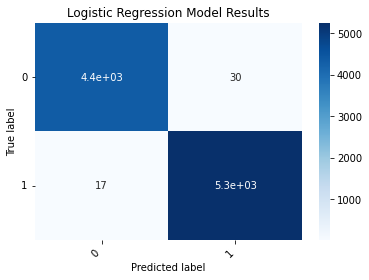

In [47]:
plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Logistic Regression Model Results')
plt.show() 

XGBClassifier

In [48]:
model_xgb = XGBClassifier(max_depth=20, min_child_weight=1,  n_estimators=50, n_jobs=-1, verbose=1, learning_rate=0.05)
model_xgb.fit(vectorized_text_train, y_train)
y_pred = model_xgb.predict(vectorized_text_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9955495756572138


In [49]:
pred = model_xgb.predict(vectorized_text_test)

In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4393
           1       0.99      1.00      1.00      5269

    accuracy                           1.00      9662
   macro avg       1.00      1.00      1.00      9662
weighted avg       1.00      1.00      1.00      9662



In [51]:
conmat = confusion_matrix(y_test, pred)
val = np.mat(conmat) 
classnames = list(set(y_train))
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )
print(df_cm)

      0     1
0  4363    30
1    13  5256


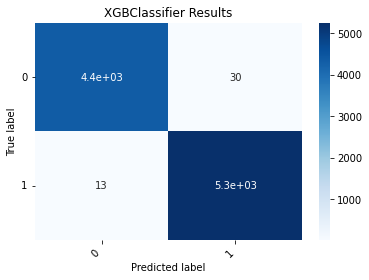

In [52]:
plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('XGBClassifier Results')
plt.show() 

DecisionTreeClassifier

In [53]:
model_dt = DecisionTreeClassifier()
model_dt.fit(vectorized_text_train, y_train)

DecisionTreeClassifier()

In [54]:
model_dt.score(vectorized_text_test, y_test)

0.9951355826950942

In [55]:
pred = model_dt.predict(vectorized_text_test)

In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4393
           1       0.99      1.00      1.00      5269

    accuracy                           1.00      9662
   macro avg       1.00      1.00      1.00      9662
weighted avg       1.00      1.00      1.00      9662



In [57]:
conmat = confusion_matrix(y_test, pred)
val = np.mat(conmat) 
classnames = list(set(y_train))
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )
print(df_cm)

      0     1
0  4366    27
1    20  5249


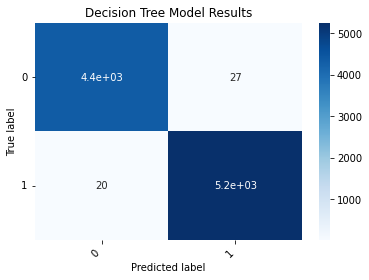

In [58]:
plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Model Results')
plt.show() 

Random Forest Classifier

In [59]:
model_rf = RandomForestClassifier(random_state=0)

In [60]:
model_rf.fit(vectorized_text_train, y_train)

RandomForestClassifier(random_state=0)

In [61]:
model_rf.score(vectorized_text_test, y_test)

0.9838542744773339

In [62]:
pred = model_rf.predict(vectorized_text_test)

In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4393
           1       0.97      1.00      0.99      5269

    accuracy                           0.98      9662
   macro avg       0.99      0.98      0.98      9662
weighted avg       0.98      0.98      0.98      9662



In [64]:
conmat = confusion_matrix(y_test, pred)
val = np.mat(conmat) 
classnames = list(set(y_train))
df_cm = pd.DataFrame(
        val, index=classnames, columns=classnames, 
    )
print(df_cm)

      0     1
0  4258   135
1    21  5248


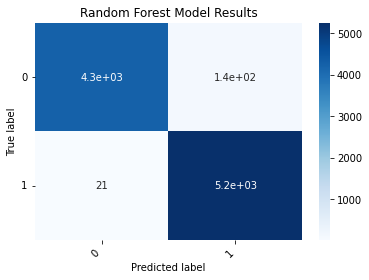

In [65]:
plt.figure()
heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Random Forest Model Results')
plt.show() 

За најдобар модел е избран XGBClassifier кој врз множеството податоци даде најдобри резултати (со користење на мерката Accuracy).